In [14]:
import pandas as pd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib
import glob
import json
import joblib
import geopandas as gpd

## Generate geojson from user labeled points

In [10]:
def genGeoJson(in_dir,out_geo_path):
    output = {
        "type": "FeatureCollection",
        "name": out_geo_path.split(".")[0],
        "crs": { "type": "name", "properties": {"name":"urn:ogc:def:crs:EPSG::3857"}},
        "features": []
    }
    fns = [
        fn 
        for fn in glob.glob(in_dir + "*.p") 
        if "request_list" in fn
        ]
    fns = sorted(fns, key=lambda x: int(x.split("_")[1]))
    request_list = joblib.load(fns[-1])
    for request in request_list:
        if request["type"] == "correction":
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": None
                },
                "properties": { "user_label": (1 if request["value"] == 4 else 0)}
            }
            xmin = request["extent"]["xmin"]
            xmax = request["extent"]["xmax"]
            ymin = request["extent"]["ymin"]
            ymax = request["extent"]["ymax"]
            polygon = [[xmin,ymax],[xmax,ymax],[xmax,ymin],[xmin,ymin],[xmin,ymax]]

            point = [
                (xmin+xmax)/2,
                (ymin+ymax)/2
            ]

            feature["geometry"]["coordinates"] = point

            output["features"].append(feature)
    
    with open(out_geo_path, "w") as f:
        f.write(json.dumps(output))

In [11]:
genGeoJson('../landcover-old/data/eqrepae1256/', './user_labeled.geojson')

## User labeled points - m_3807537_ne

In [18]:
user_gdf = gpd.read_file('./user_labeled.geojson')

In [22]:
chicken_user_gdf = user_gdf[user_gdf.user_label == 1]

In [28]:
non_chicken_gdf = user_gdf[user_gdf.user_label == 0]

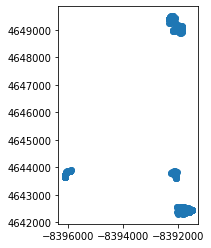

In [29]:
non_chicken_gdf.plot()

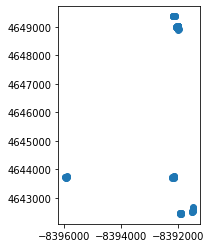

In [23]:
chicken_user_gdf.plot()

In [33]:
non_chicken_gdf.to_file('non_chicken_user.geojson',driver="GeoJSON")

In [32]:
chicken_user_gdf.to_file('chicken_user.geojson',driver="GeoJSON")

## Ground truth

In [26]:
gt_gdf = gpd.read_file('../landcover_scripts/binary_raster_md/m_3807537_ne_18_1_20170611_inference_rasterized.geojson')

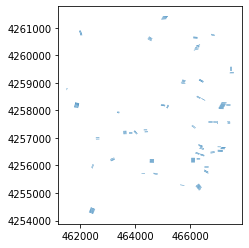

In [27]:
gt_gdf.plot()